In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Tool_Performance/Illumina_Simulations.csv")
df['Simulation'] = df['Simulation'].str.lower()
df['Complexity'] = df['Complexity'].str.lower()
df = df[df['Parameter']!="Greater_2"]
df["id"] = df['Simulation'] + "_" + df["Complexity"]
df["id2"] = df['Simulation'] + "_" + df['Tool']
df['id3'] = df['Complexity'] + "_" + df["Tool"]
df['unique'] = df['Prophage_Category']+df['id']+df['id2']
homology=['VirSorter', 'Kraken', "Earth_Virome"]
df['Homology'] = [1 if x in homology else 0 for x in df['Tool']]
df_pv = df[df["Prophage_Category"]=="Prophage_Viruses"]
df_pb = df[df["Prophage_Category"]=="Prophage_Bacteria"]
df_pr = df[df["Prophage_Category"]=="Prophage_Removed"]

## Figure 2 F1 Performances 

### Prophages as Bacteria

KruskalResult(statistic=58.77501272878312, pvalue=2.1764517503722453e-11)


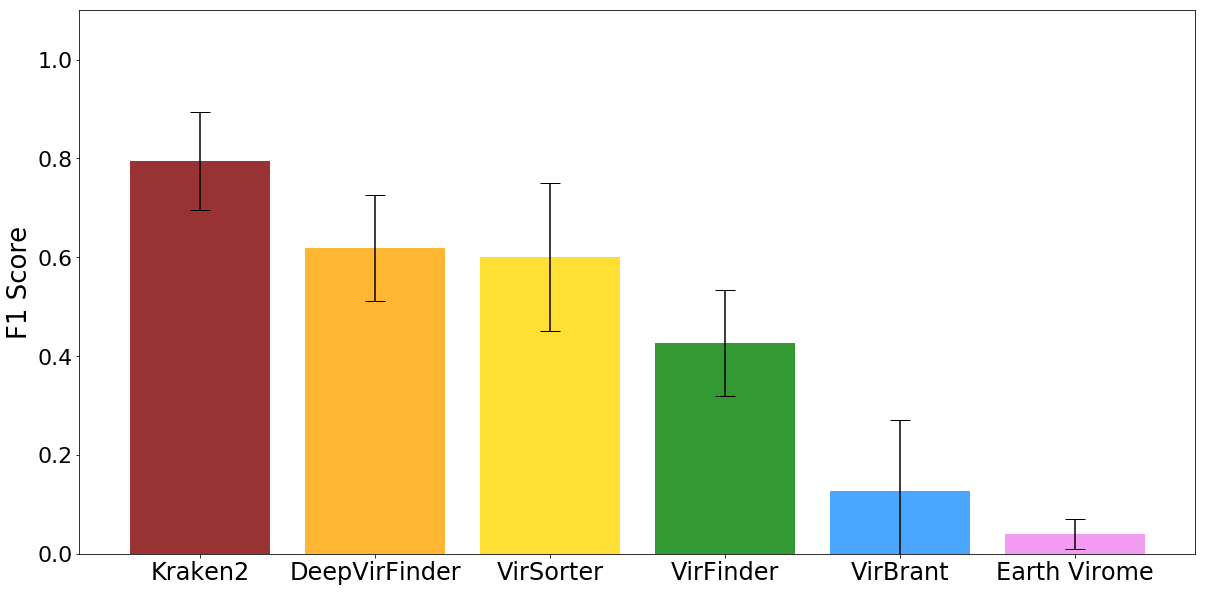

In [26]:
print(kruskal(*[group["F1_Score"].values for name, group in df_pb.groupby("Tool")]))
tabs = df_pb.pivot(index="id", columns="Tool", values="F1_Score")
tabs = tabs[["Kraken", "DeepVirFinder", "VirSorter", "VirFinder", "Modeling", "Earth_Virome"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Kraken2"
Tools[4] = "VirBrant"
Tools[5] = "Earth Virome"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ['maroon', 'orange', 'gold', "green", "dodgerblue", "violet"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('F1 Score', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_2_F1_Performance_of_Tools/Figure_2A_Prophages_as_Bacteria_F1.jpg")

### Prophages as Viral

KruskalResult(statistic=2.359589041095859, pvalue=0.7974765079428775)


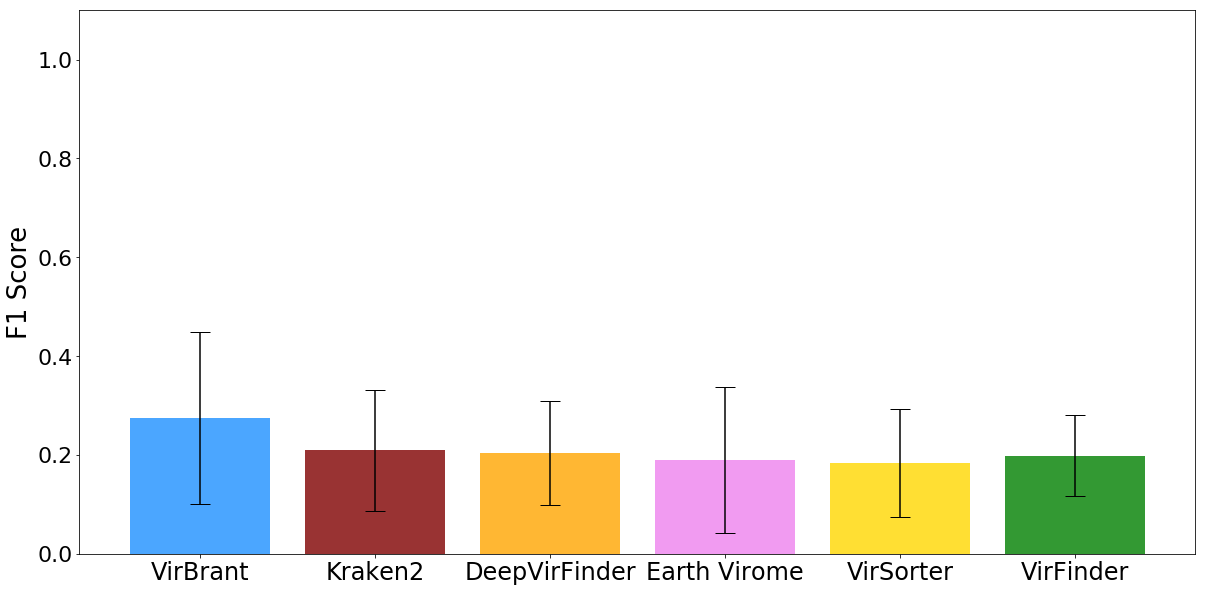

In [27]:
print(kruskal(*[group["F1_Score"].values for name, group in df_pv.groupby("Tool")]))
tabs = df_pv.pivot(index="id", columns="Tool", values="F1_Score")
tabs = tabs[["Modeling", "Kraken", "DeepVirFinder", "Earth_Virome", "VirSorter", "VirFinder"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[1] = "Kraken2"
Tools[0] = "VirBrant"
Tools[3] = "Earth Virome"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ["dodgerblue", 'maroon', 'orange', "violet", 'gold', "green"]

ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('F1 Score', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_2_F1_Performance_of_Tools/Figure_2B_Prophages_as_Viral_F1.jpg")

### Prophages Removed

KruskalResult(statistic=55.76956521739129, pvalue=9.064696425222741e-11)


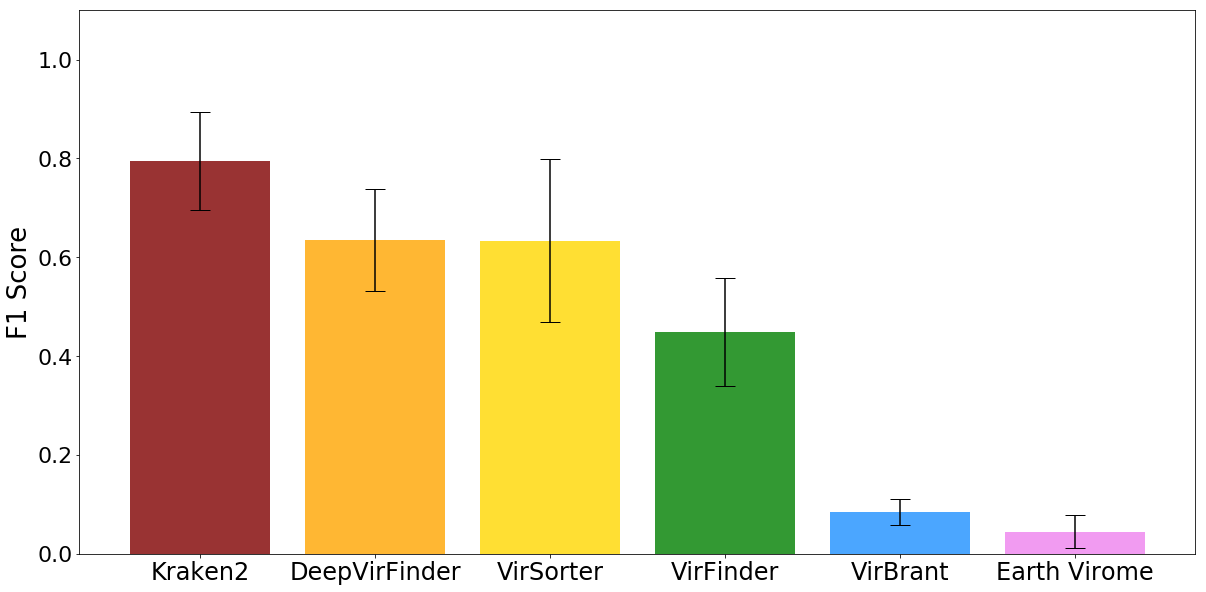

In [28]:
print(kruskal(*[group["F1_Score"].values for name, group in df_pr.groupby("Tool")]))
tabs = df_pr.pivot(index="id", columns="Tool", values="F1_Score")
tabs = tabs[["Kraken", "DeepVirFinder", "VirSorter", "VirFinder", "Modeling", "Earth Virome"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Kraken2"
Tools[4] = "VirBrant"
Tools[5] = "Earth Virome"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ['maroon', 'orange', 'gold', "green", "dodgerblue", "violet"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('F1 Score', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_2_F1_Performance_of_Tools/Figure_Supplemental_Prophages_Removed_F1.jpg")

## Figure 3 Precision and Recall

### Prophages as Bacteria

#### Precision

KruskalResult(statistic=64.60425409330865, pvalue=1.3538846197156903e-12)


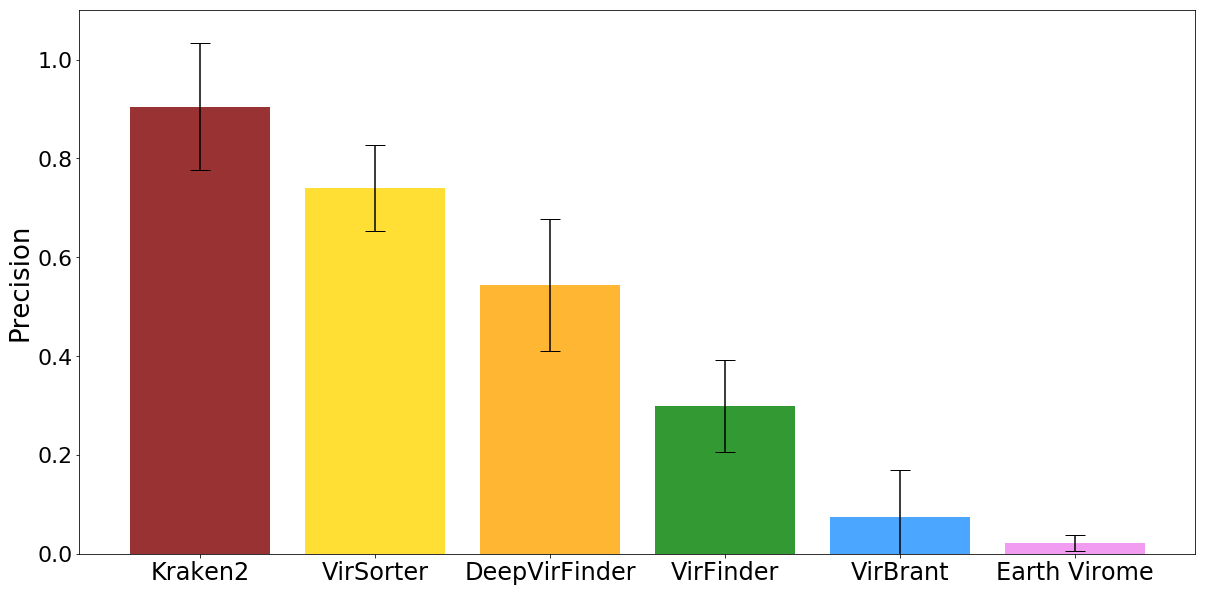

In [29]:
print(kruskal(*[group["Precision"].values for name, group in df_pb.groupby("Tool")]))
tabs = df_pb.pivot(index="id", columns="Tool", values="Precision")
tabs = tabs[["Kraken", "VirSorter", "DeepVirFinder", "VirFinder", "Modeling", "Earth_Virome"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Kraken2"
Tools[4] = "VirBrant"
Tools[5] = "Earth Virome"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ['maroon', 'gold', 'orange', "green", "dodgerblue", "violet"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('Precision', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_3_Precision_Recall_of_Tools/Figure_3A_Precision_of_Tools_Prophage_as_Bacteria.jpg")

#### Recall

KruskalResult(statistic=46.696208049010735, pvalue=6.552090558142196e-09)


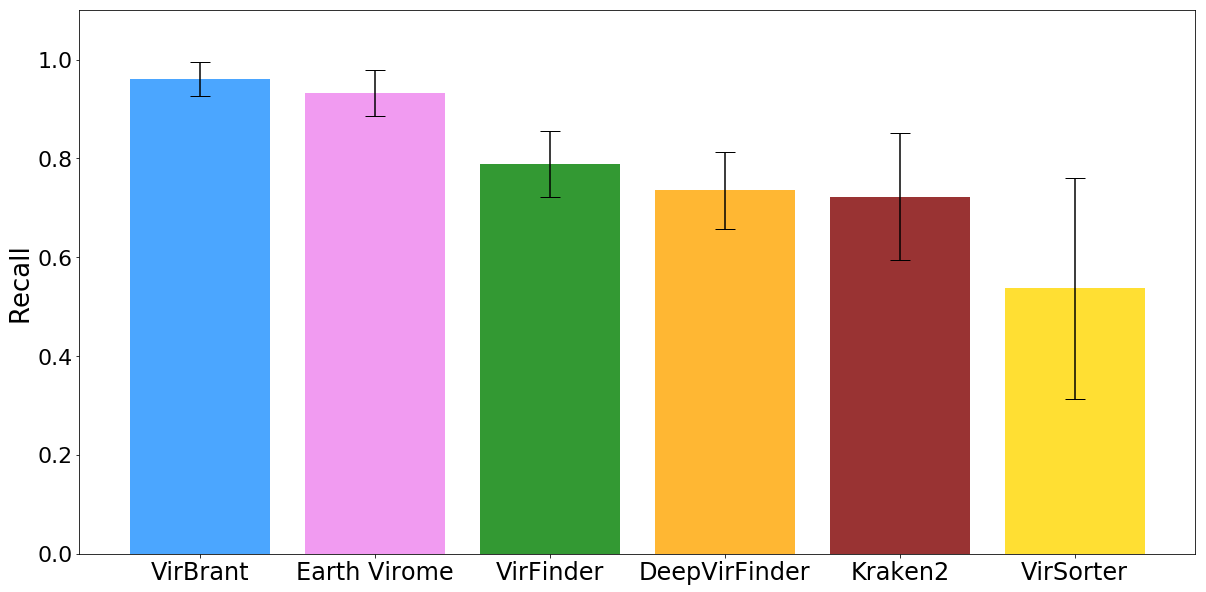

In [30]:
print(kruskal(*[group["Recall"].values for name, group in df_pb.groupby("Tool")]))
tabs = df_pb.pivot(index="id", columns="Tool", values="Recall")
tabs = tabs[["Modeling", "Earth_Virome", "VirFinder", "DeepVirFinder", "Kraken", "VirSorter"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[4] = "Kraken2"
Tools[0] = "VirBrant"
Tools[1] = "Earth Virome"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ["dodgerblue", "violet", "green", 'orange', 'maroon', 'gold']


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('Recall', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_3_Precision_Recall_of_Tools/Figure_3B_Recall_of_Tools_Prophage_as_Bacteria.jpg")

### Prophage as Viral

#### Precision

KruskalResult(statistic=60.61263318112634, pvalue=9.08050820599654e-12)


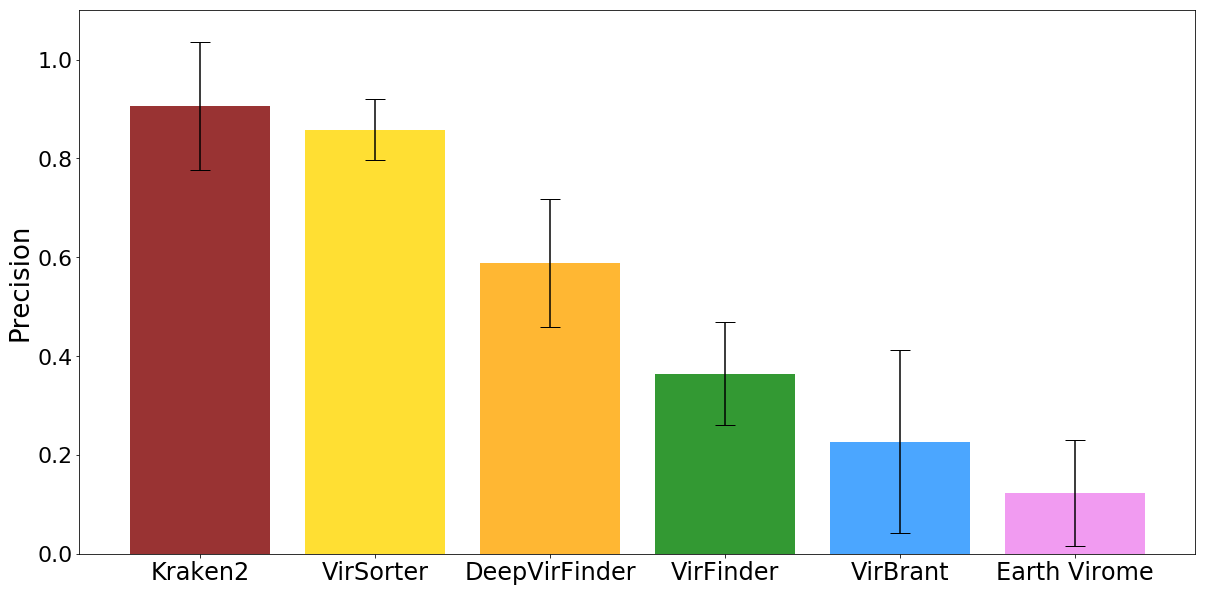

In [34]:
print(kruskal(*[group["Precision"].values for name, group in df_pv.groupby("Tool")]))
tabs = df_pv.pivot(index="id", columns="Tool", values="Precision")
tabs = tabs[["Kraken", "VirSorter", "DeepVirFinder", "VirFinder", "Modeling", "Earth_Virome"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Kraken2"
Tools[4] = "VirBrant"
Tools[5] = "Earth Virome"
x_pos = np.arange(len(Tools))


fig, ax = plt.subplots(figsize=(20, 10))
c = ['maroon', 'gold', 'orange', "green", "dodgerblue", "violet"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('Precision', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_3_Precision_Recall_of_Tools/Figure_Supplemental_Precision_of_Tools_Prophage_as_Viral.jpg")

#### Recall

KruskalResult(statistic=49.448385644455875, pvalue=1.796962311687789e-09)


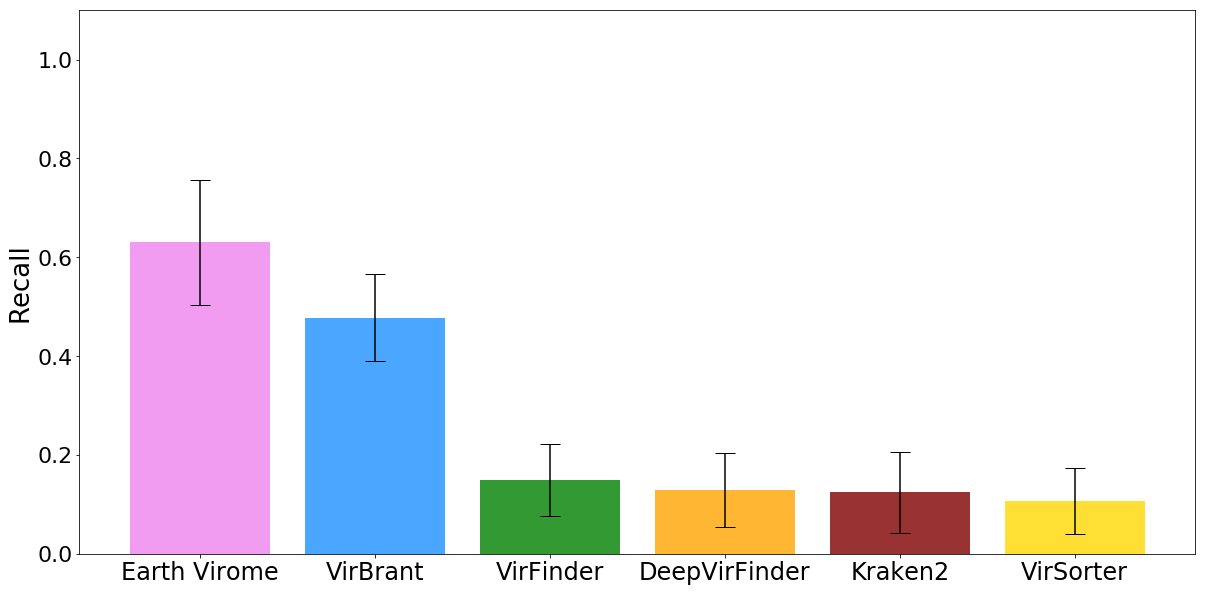

In [35]:
print(kruskal(*[group["Recall"].values for name, group in df_pv.groupby("Tool")]))
tabs = df_pv.pivot(index="id", columns="Tool", values="Recall")
tabs = tabs[["Earth_Virome", "Modeling", "VirFinder", "DeepVirFinder", "Kraken", "VirSorter"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Earth Virome"
Tools[4] = "Kraken2"
Tools[1] = "VirBrant"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ["violet","dodgerblue", "green", 'orange', 'maroon', 'gold']


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('Recall', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_3_Precision_Recall_of_Tools/Figure_Supplemental_Recall_of_Tools_Prophage_as_Viral.jpg")

### Prophages Removed

#### Precision

KruskalResult(statistic=62.18591863205396, pvalue=4.291749100908476e-12)


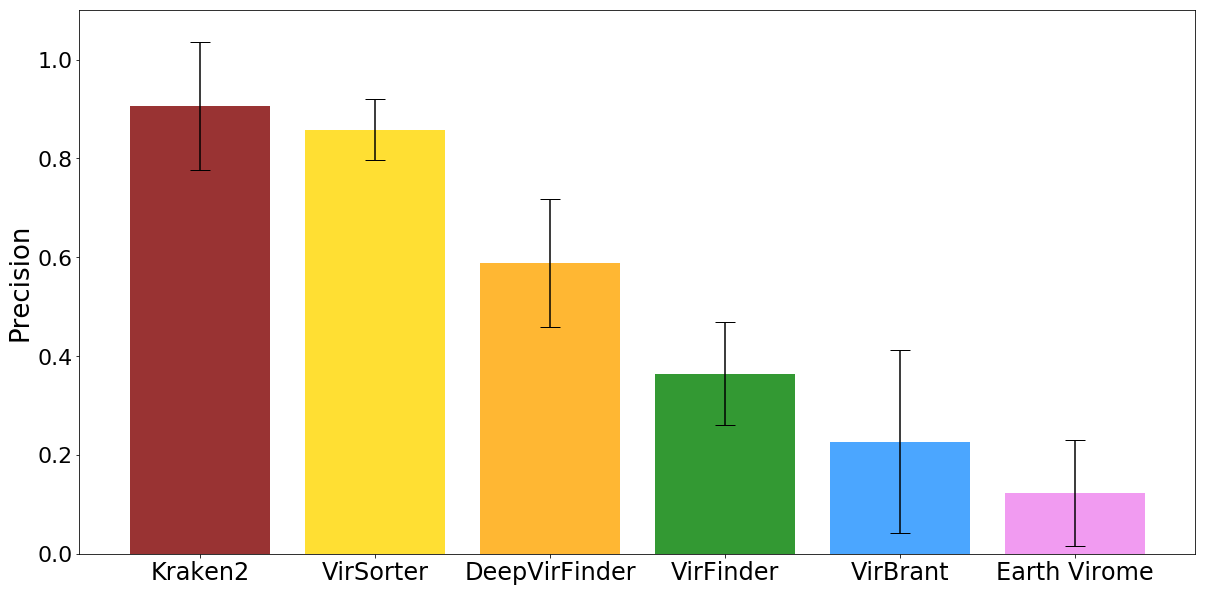

In [37]:
print(kruskal(*[group["Precision"].values for name, group in df_pr.groupby("Tool")]))
tabs = df_pv.pivot(index="id", columns="Tool", values="Precision")
tabs = tabs[["Kraken", "VirSorter", "DeepVirFinder", "VirFinder", "Modeling", "Earth_Virome"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Kraken2"
Tools[4] = "VirBrant"
Tools[5] = "Earth Virome"
x_pos = np.arange(len(Tools))


fig, ax = plt.subplots(figsize=(20, 10))
c = ['maroon', 'gold', 'orange', "green", "dodgerblue", "violet"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('Precision', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_3_Precision_Recall_of_Tools/Figure_Supplemental_Precision_of_Tools_Prophage_Removed.jpg")

#### Recall

KruskalResult(statistic=42.7807513939143, pvalue=4.0931152522942346e-08)


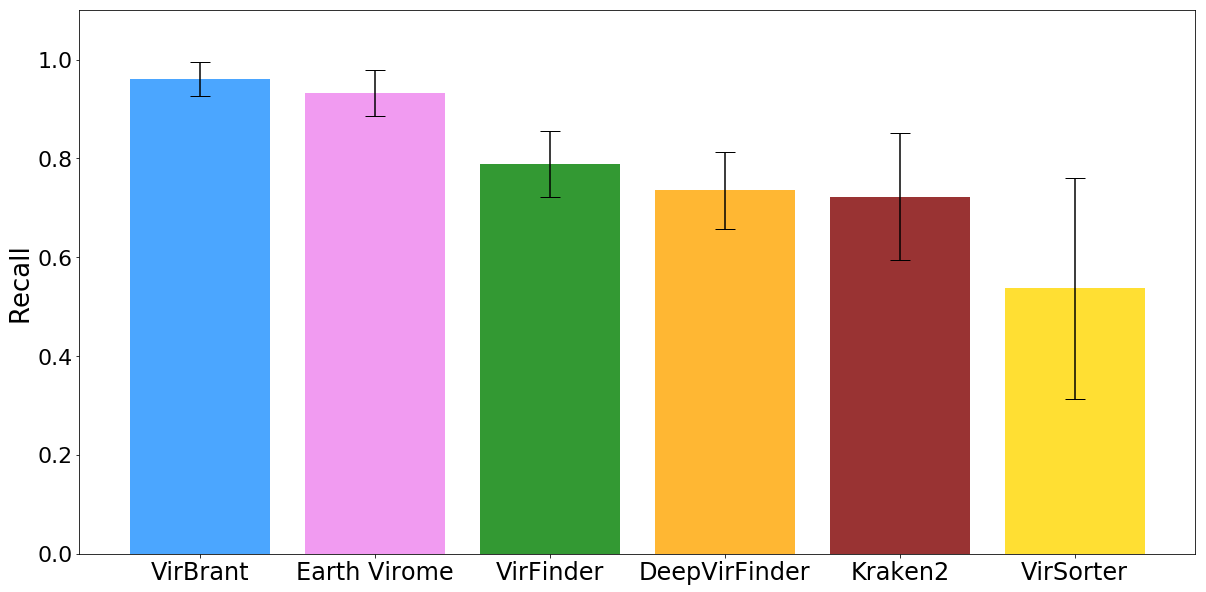

In [39]:
print(kruskal(*[group["Recall"].values for name, group in df_pr.groupby("Tool")]))
tabs = df_pb.pivot(index="id", columns="Tool", values="Recall")
tabs = tabs[["Modeling", "Earth_Virome", "VirFinder", "DeepVirFinder", "Kraken", "VirSorter"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[4] = "Kraken2"
Tools[0] = "VirBrant"
Tools[1] = "Earth Virome"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ["dodgerblue", "violet", "green", 'orange', 'maroon', 'gold']


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('Recall', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)
plt.savefig("../figures/Figure_3_Precision_Recall_of_Tools/Figure_Supplemental_Recall_of_Tools_Prophage_Removed.jpg")

## Performance By Taxonomic Complexity and Read Abundances

### Taxanomic Complexity

KruskalResult(statistic=2.66601006731991, pvalue=0.44603446486891407)


(0, 1.1)

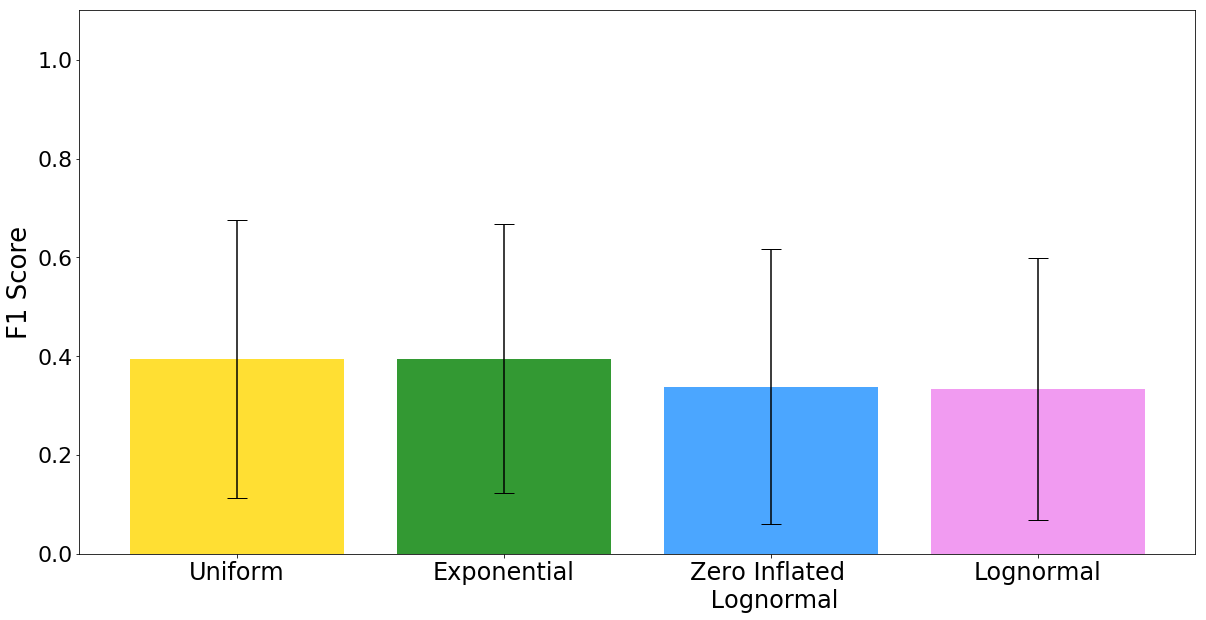

In [67]:
print(kruskal(*[group["F1_Score"].values for name, group in df.groupby("Simulation")]))
tabs = df.pivot(index="unique", columns="Simulation", values="F1_Score")

tabs = tabs[["uniform", "exponential", "zero", "lognormal"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Uniform"
Tools[1] = "Exponential"
Tools[2] = "Zero Inflated \n Lognormal"
Tools[3] = "Lognormal"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ['gold', "green", "dodgerblue", "violet"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
plt.ylabel('F1 Score', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)

### Read Abundances

KruskalResult(statistic=9.007278320600067, pvalue=0.011068642590844356)


(0, 1.1)

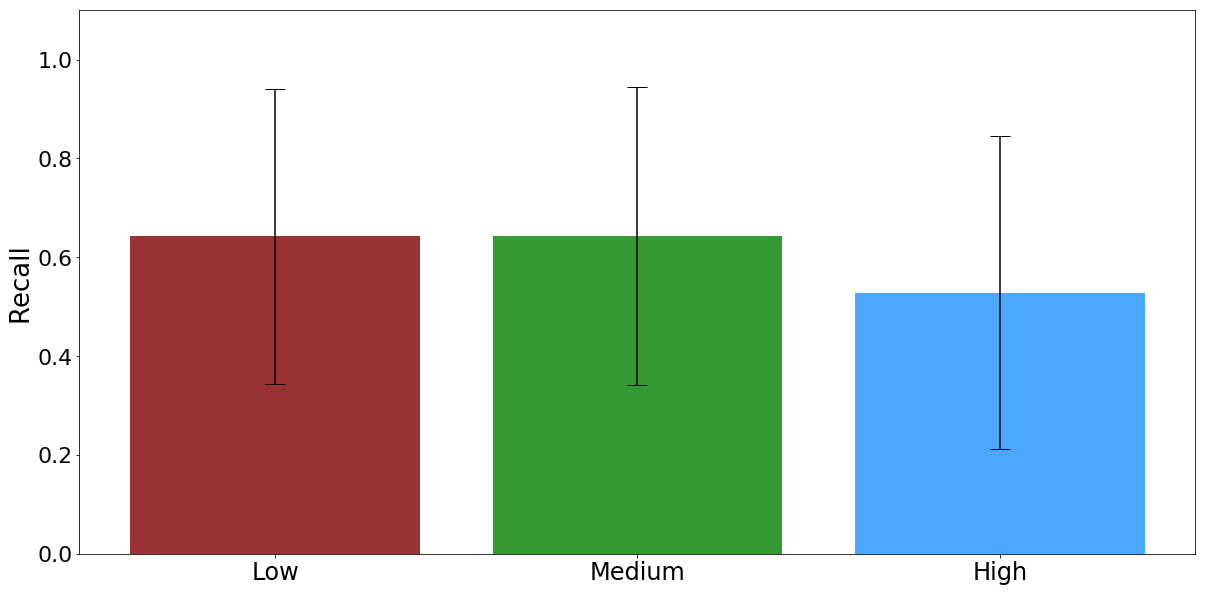

In [68]:
print(kruskal(*[group["Recall"].values for name, group in df.groupby("Complexity")]))
tabs = df.pivot(index="unique", columns="Complexity", values="Recall")
tabs = tabs[["low", "medium", "high"]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Low"
Tools[1] = "Medium"
Tools[2] = "High"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ['maroon', "green", "dodgerblue"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
ax.set_ylabel('Recall', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)

### Homology

KruskalResult(statistic=2.143616403605134, pvalue=0.14316405293408413)


(0, 1.1)

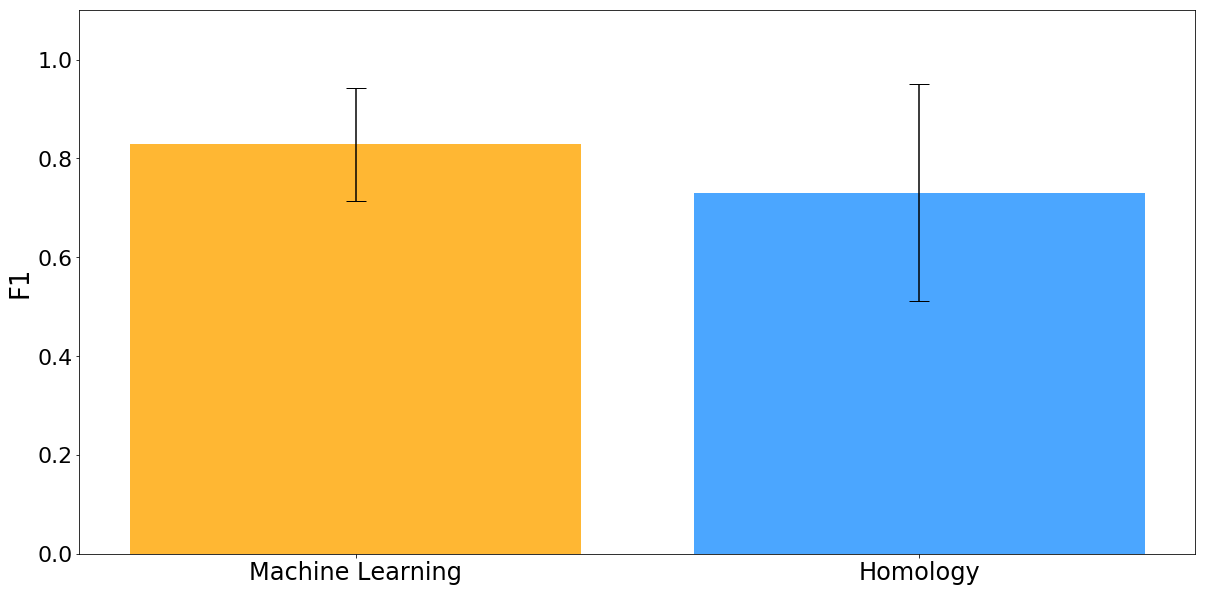

In [69]:
print(kruskal(*[group["F1_Score"].values for name, group in df_pb.groupby("Homology")]))
tabs = df_pb.pivot(index="unique", columns="Homology", values="Recall")
tabs = tabs[[0,1]]


means = list(tabs.mean())
error = list(tabs.std())
Tools = list(tabs.columns)
Tools[0] = "Machine Learning"
Tools[1] = "Homology"

x_pos = np.arange(len(Tools))

fig, ax = plt.subplots(figsize=(20, 10))
c = ['orange', "dodgerblue"]


ax.bar(x_pos, means, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, color=c)
ax.set_ylabel('F1', fontsize=26)
ax.set_xticks(x_pos)
ax.set_xticklabels(Tools, fontsize=24)
plt.yticks(fontsize=22)
ax.set_title('')
plt.ylim(0,1.1)

## Ranked Based Scoring Tables

### Prophages as Bacteria

#### Ranking

In [4]:
df_pb_low = df_pb[df_pb['Complexity']=="low"]
df_pb_medium = df_pb[df_pb['Complexity']=="medium"]
df_pb_high = df_pb[df_pb['Complexity']=="high"]

df_pb_low_e = df_pb_low[df_pb_low['Simulation']=="exponential"]
df_pb_low_e["f1_rank"] = df_pb_low_e['F1_Score'].rank(ascending=False)
df_pb_low_e["precision_rank"] = df_pb_low_e['Precision'].rank(ascending=False)
df_pb_low_e["recall_rank"] = df_pb_low_e['Recall'].rank(ascending=False)

df_pb_low_l = df_pb_low[df_pb_low['Simulation']=="lognormal"]
df_pb_low_l["f1_rank"] = df_pb_low_l['F1_Score'].rank(ascending=False)
df_pb_low_l["precision_rank"] = df_pb_low_l['Precision'].rank(ascending=False)
df_pb_low_l["recall_rank"] = df_pb_low_l['Recall'].rank(ascending=False)

df_pb_low_u = df_pb_low[df_pb_low['Simulation']=="uniform"]
df_pb_low_u["f1_rank"] = df_pb_low_u['F1_Score'].rank(ascending=False)
df_pb_low_u["precision_rank"] = df_pb_low_u['Precision'].rank(ascending=False)
df_pb_low_u["recall_rank"] = df_pb_low_u['Recall'].rank(ascending=False)

df_pb_low_z = df_pb_low[df_pb_low['Simulation']=="zero"]
df_pb_low_z["f1_rank"] = df_pb_low_z['F1_Score'].rank(ascending=False)
df_pb_low_z["precision_rank"] = df_pb_low_z['Precision'].rank(ascending=False)
df_pb_low_z["recall_rank"] = df_pb_low_z['Recall'].rank(ascending=False)

df_pb_medium_e = df_pb_medium[df_pb_medium['Simulation']=="exponential"]
df_pb_medium_e["f1_rank"] = df_pb_medium_e['F1_Score'].rank(ascending=False)
df_pb_medium_e["precision_rank"] = df_pb_medium_e['Precision'].rank(ascending=False)
df_pb_medium_e["recall_rank"] = df_pb_medium_e['Recall'].rank(ascending=False)

df_pb_medium_l = df_pb_medium[df_pb_medium['Simulation']=="lognormal"]
df_pb_medium_l["f1_rank"] = df_pb_medium_l['F1_Score'].rank(ascending=False)
df_pb_medium_l["precision_rank"] = df_pb_medium_l['Precision'].rank(ascending=False)
df_pb_medium_l["recall_rank"] = df_pb_medium_l['Recall'].rank(ascending=False)

df_pb_medium_u = df_pb_medium[df_pb_medium['Simulation']=="uniform"]
df_pb_medium_u["f1_rank"] = df_pb_medium_u['F1_Score'].rank(ascending=False)
df_pb_medium_u["precision_rank"] = df_pb_medium_u['Precision'].rank(ascending=False)
df_pb_medium_u["recall_rank"] = df_pb_medium_u['Recall'].rank(ascending=False)

df_pb_medium_z = df_pb_medium[df_pb_medium['Simulation']=="zero"]
df_pb_medium_z["f1_rank"] = df_pb_medium_z['F1_Score'].rank(ascending=False)
df_pb_medium_z["precision_rank"] = df_pb_medium_z['Precision'].rank(ascending=False)
df_pb_medium_z["recall_rank"] = df_pb_medium_z['Recall'].rank(ascending=False)


df_pb_high_e = df_pb_high[df_pb_high['Simulation']=="exponential"]
df_pb_high_e["f1_rank"] = df_pb_high_e['F1_Score'].rank(ascending=False)
df_pb_high_e["precision_rank"] = df_pb_high_e['Precision'].rank(ascending=False)
df_pb_high_e["recall_rank"] = df_pb_high_e['Recall'].rank(ascending=False)

df_pb_high_l = df_pb_high[df_pb_high['Simulation']=="lognormal"]
df_pb_high_l["f1_rank"] = df_pb_high_l['F1_Score'].rank(ascending=False)
df_pb_high_l["precision_rank"] = df_pb_high_l['Precision'].rank(ascending=False)
df_pb_high_l["recall_rank"] = df_pb_high_l['Recall'].rank(ascending=False)


df_pb_high_u = df_pb_high[df_pb_high['Simulation']=="uniform"]
df_pb_high_u["f1_rank"] = df_pb_high_u['F1_Score'].rank(ascending=False)
df_pb_high_u["precision_rank"] = df_pb_high_u['Precision'].rank(ascending=False)
df_pb_high_u["recall_rank"] = df_pb_high_u['Recall'].rank(ascending=False)

df_pb_high_z = df_pb_high[df_pb_high['Simulation']=="zero"]
df_pb_high_z["f1_rank"] = df_pb_high_z['F1_Score'].rank(ascending=False)
df_pb_high_z["precision_rank"] = df_pb_high_z['Precision'].rank(ascending=False)
df_pb_high_z["recall_rank"] = df_pb_high_z['Recall'].rank(ascending=False)


df_pb = pd.concat([df_pb_low_e, df_pb_low_l, df_pb_low_u, df_pb_low_z,
                   df_pb_high_e, df_pb_high_l, df_pb_high_u, df_pb_high_z,
                   df_pb_medium_e, df_pb_medium_l, df_pb_medium_u, df_pb_medium_z])

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

#### Table

In [5]:
df_pb.groupby("Tool").mean()

,Precision,Recall,F1_Score,f1_rank,precision_rank,recall_rank
Tool,,,,,,
DeepVirFinder,0.543856,0.735439,0.618614,2.333333,3.00,4.541667
Earth_Virome,0.021028,0.931954,0.040625,6.000000,6.00,1.791667
Kraken,0.905021,0.722600,0.794178,1.166667,1.25,4.333333
Modeling,0.075047,0.960409,0.127948,5.000000,5.00,1.291667
VirFinder,0.298962,0.789251,0.427172,3.916667,4.00,3.625000
VirSorter,0.739636,0.536938,0.601281,2.583333,1.75,5.416667


### Prophages as Viral

#### Ranking

In [6]:
df_pv_low = df_pv[df_pv['Complexity']=="low"]
df_pv_medium = df_pv[df_pv['Complexity']=="medium"]
df_pv_high = df_pv[df_pv['Complexity']=="high"]

df_pv_low_e = df_pv_low[df_pv_low['Simulation']=="exponential"]
df_pv_low_e["f1_rank"] = df_pv_low_e['F1_Score'].rank(ascending=False)
df_pv_low_e["precision_rank"] = df_pv_low_e['Precision'].rank(ascending=False)
df_pv_low_e["recall_rank"] = df_pv_low_e['Recall'].rank(ascending=False)

df_pv_low_l = df_pv_low[df_pv_low['Simulation']=="lognormal"]
df_pv_low_l["f1_rank"] = df_pv_low_l['F1_Score'].rank(ascending=False)
df_pv_low_l["precision_rank"] = df_pv_low_l['Precision'].rank(ascending=False)
df_pv_low_l["recall_rank"] = df_pv_low_l['Recall'].rank(ascending=False)


df_pv_low_u = df_pv_low[df_pv_low['Simulation']=="uniform"]
df_pv_low_u["f1_rank"] = df_pv_low_u['F1_Score'].rank(ascending=False)
df_pv_low_u["precision_rank"] = df_pv_low_u['Precision'].rank(ascending=False)
df_pv_low_u["recall_rank"] = df_pv_low_u['Recall'].rank(ascending=False)

df_pv_low_z = df_pv_low[df_pv_low['Simulation']=="zero"]
df_pv_low_z["f1_rank"] = df_pv_low_z['F1_Score'].rank(ascending=False)
df_pv_low_z["precision_rank"] = df_pv_low_z['Precision'].rank(ascending=False)
df_pv_low_z["recall_rank"] = df_pv_low_z['Recall'].rank(ascending=False)


df_pv_medium_e = df_pv_medium[df_pv_medium['Simulation']=="exponential"]
df_pv_medium_e["f1_rank"] = df_pv_medium_e['F1_Score'].rank(ascending=False)
df_pv_medium_e["precision_rank"] = df_pv_medium_e['Precision'].rank(ascending=False)
df_pv_medium_e["recall_rank"] = df_pv_medium_e['Recall'].rank(ascending=False)

df_pv_medium_l = df_pv_medium[df_pv_medium['Simulation']=="lognormal"]
df_pv_medium_l["f1_rank"] = df_pv_medium_l['F1_Score'].rank(ascending=False)
df_pv_medium_l["precision_rank"] = df_pv_medium_l['Precision'].rank(ascending=False)
df_pv_medium_l["recall_rank"] = df_pv_medium_l['Recall'].rank(ascending=False)


df_pv_medium_u = df_pv_medium[df_pv_medium['Simulation']=="uniform"]
df_pv_medium_u["f1_rank"] = df_pv_medium_u['F1_Score'].rank(ascending=False)
df_pv_medium_u["precision_rank"] = df_pv_medium_u['Precision'].rank(ascending=False)
df_pv_medium_u["recall_rank"] = df_pv_medium_u['Recall'].rank(ascending=False)

df_pv_medium_z = df_pv_medium[df_pv_medium['Simulation']=="zero"]
df_pv_medium_z["f1_rank"] = df_pv_medium_z['F1_Score'].rank(ascending=False)
df_pv_medium_z["precision_rank"] = df_pv_medium_z['Precision'].rank(ascending=False)
df_pv_medium_z["recall_rank"] = df_pv_medium_z['Recall'].rank(ascending=False)


df_pv_high_e = df_pv_high[df_pv_high['Simulation']=="exponential"]
df_pv_high_e["f1_rank"] = df_pv_high_e['F1_Score'].rank(ascending=False)
df_pv_high_e["precision_rank"] = df_pv_high_e['Precision'].rank(ascending=False)
df_pv_high_e["recall_rank"] = df_pv_high_e['Recall'].rank(ascending=False)

df_pv_high_l = df_pv_high[df_pv_high['Simulation']=="lognormal"]
df_pv_high_l["f1_rank"] = df_pv_high_l['F1_Score'].rank(ascending=False)
df_pv_high_l["precision_rank"] = df_pv_high_l['Precision'].rank(ascending=False)
df_pv_high_l["recall_rank"] = df_pv_high_l['Recall'].rank(ascending=False)


df_pv_high_u = df_pv_high[df_pv_high['Simulation']=="uniform"]
df_pv_high_u["f1_rank"] = df_pv_high_u['F1_Score'].rank(ascending=False)
df_pv_high_u["precision_rank"] = df_pv_high_u['Precision'].rank(ascending=False)
df_pv_high_u["recall_rank"] = df_pv_high_u['Recall'].rank(ascending=False)

df_pv_high_z = df_pv_high[df_pv_high['Simulation']=="zero"]
df_pv_high_z["f1_rank"] = df_pv_high_z['F1_Score'].rank(ascending=False)
df_pv_high_z["precision_rank"] = df_pv_high_z['Precision'].rank(ascending=False)
df_pv_high_z["recall_rank"] = df_pv_high_z['Recall'].rank(ascending=False)


df_pv = pd.concat([df_pv_low_e, df_pv_low_l, df_pv_low_u, df_pv_low_z,
                   df_pv_high_e, df_pv_high_l, df_pv_high_u, df_pv_high_z,
                   df_pv_medium_e, df_pv_medium_l, df_pv_medium_u, df_pv_medium_z])

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

#### Table

In [7]:
df_pv.groupby("Tool").mean()

,Precision,Recall,F1_Score,f1_rank,precision_rank,recall_rank
Tool,,,,,,
DeepVirFinder,0.588081,0.129319,0.203748,3.166667,3.000000,4.333333
Earth_Virome,0.122658,0.629937,0.190502,4.333333,5.916667,1.333333
Kraken,0.906118,0.124694,0.209169,2.750000,1.333333,4.833333
Modeling,0.227234,0.477755,0.275111,3.333333,4.916667,1.666667
VirFinder,0.364373,0.148868,0.198170,3.166667,4.166667,3.333333
VirSorter,0.858038,0.106789,0.183798,4.250000,1.666667,5.500000


### Prophages Removed

#### Ranking

In [8]:
df_pr_low = df_pr[df_pr['Complexity']=="low"]
df_pr_medium = df_pr[df_pr['Complexity']=="medium"]
df_pr_high = df_pr[df_pr['Complexity']=="high"]

df_pr_low_e = df_pr_low[df_pr_low['Simulation']=="exponential"]
df_pr_low_e["f1_rank"] = df_pr_low_e['F1_Score'].rank(ascending=False)
df_pr_low_e["precision_rank"] = df_pr_low_e['Precision'].rank(ascending=False)
df_pr_low_e["recall_rank"] = df_pr_low_e['Recall'].rank(ascending=False)

df_pr_low_l = df_pr_low[df_pr_low['Simulation']=="lognormal"]
df_pr_low_l["f1_rank"] = df_pr_low_l['F1_Score'].rank(ascending=False)
df_pr_low_l["precision_rank"] = df_pr_low_l['Precision'].rank(ascending=False)
df_pr_low_l["recall_rank"] = df_pr_low_l['Recall'].rank(ascending=False)

df_pr_low_u = df_pr_low[df_pr_low['Simulation']=="uniform"]
df_pr_low_u["f1_rank"] = df_pr_low_u['F1_Score'].rank(ascending=False)
df_pr_low_u["precision_rank"] = df_pr_low_u['Precision'].rank(ascending=False)
df_pr_low_u["recall_rank"] = df_pr_low_u['Recall'].rank(ascending=False)

df_pr_low_z = df_pr_low[df_pr_low['Simulation']=="zero"]
df_pr_low_z["f1_rank"] = df_pr_low_z['F1_Score'].rank(ascending=False)
df_pr_low_z["precision_rank"] = df_pr_low_z['Precision'].rank(ascending=False)
df_pr_low_z["recall_rank"] = df_pr_low_z['Recall'].rank(ascending=False)


df_pr_medium_e = df_pr_medium[df_pr_medium['Simulation']=="exponential"]
df_pr_medium_e["f1_rank"] = df_pr_medium_e['F1_Score'].rank(ascending=False)
df_pr_medium_e["precision_rank"] = df_pr_medium_e['Precision'].rank(ascending=False)
df_pr_medium_e["recall_rank"] = df_pr_medium_e['Recall'].rank(ascending=False)

df_pr_medium_l = df_pr_medium[df_pr_medium['Simulation']=="lognormal"]
df_pr_medium_l["f1_rank"] = df_pr_medium_l['F1_Score'].rank(ascending=False)
df_pr_medium_l["precision_rank"] = df_pr_medium_l['Precision'].rank(ascending=False)
df_pr_medium_l["recall_rank"] = df_pr_medium_l['Recall'].rank(ascending=False)


df_pr_medium_u = df_pr_medium[df_pr_medium['Simulation']=="uniform"]
df_pr_medium_u["f1_rank"] = df_pr_medium_u['F1_Score'].rank(ascending=False)
df_pr_medium_u["precision_rank"] = df_pr_medium_u['Precision'].rank(ascending=False)
df_pr_medium_u["recall_rank"] = df_pr_medium_u['Recall'].rank(ascending=False)

df_pr_medium_z = df_pr_medium[df_pr_medium['Simulation']=="zero"]
df_pr_medium_z["f1_rank"] = df_pr_medium_z['F1_Score'].rank(ascending=False)
df_pr_medium_z["precision_rank"] = df_pr_medium_z['Precision'].rank(ascending=False)
df_pr_medium_z["recall_rank"] = df_pr_medium_z['Recall'].rank(ascending=False)


df_pr_high_e = df_pr_high[df_pr_high['Simulation']=="exponential"]
df_pr_high_e["f1_rank"] = df_pr_high_e['F1_Score'].rank(ascending=False)
df_pr_high_e["precision_rank"] = df_pr_high_e['Precision'].rank(ascending=False)
df_pr_high_e["recall_rank"] = df_pr_high_e['Recall'].rank(ascending=False)

df_pr_high_l = df_pr_high[df_pr_high['Simulation']=="lognormal"]
df_pr_high_l["f1_rank"] = df_pr_high_l['F1_Score'].rank(ascending=False)
df_pr_high_l["precision_rank"] = df_pr_high_l['Precision'].rank(ascending=False)
df_pr_high_l["recall_rank"] = df_pr_high_l['Recall'].rank(ascending=False)


df_pr_high_u = df_pr_high[df_pr_high['Simulation']=="uniform"]
df_pr_high_u["f1_rank"] = df_pr_high_u['F1_Score'].rank(ascending=False)
df_pr_high_u["precision_rank"] = df_pr_high_u['Precision'].rank(ascending=False)
df_pr_high_u["recall_rank"] = df_pr_high_u['Recall'].rank(ascending=False)

df_pr_high_z = df_pr_high[df_pr_high['Simulation']=="zero"]
df_pr_high_z["f1_rank"] = df_pr_high_z['F1_Score'].rank(ascending=False)
df_pr_high_z["precision_rank"] = df_pr_high_z['Precision'].rank(ascending=False)
df_pr_high_z["recall_rank"] = df_pr_high_z['Recall'].rank(ascending=False)


df_pr = pd.concat([df_pr_low_e, df_pr_low_l, df_pr_low_u, df_pr_low_z,
                   df_pr_high_e, df_pr_high_l, df_pr_high_u, df_pr_high_z,
                   df_pr_medium_e, df_pr_medium_l, df_pr_medium_u, df_pr_medium_z])

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

#### Table

In [9]:
df_pr.groupby("Tool").mean()

,Precision,Recall,F1_Score,f1_rank,precision_rank,recall_rank
Tool,,,,,,
DeepVirFinder,0.568608,0.735439,0.634289,2.416667,3.000000,4.291667
Earth Virome,0.023781,0.931954,0.044916,5.750000,5.750000,1.583333
Kraken,0.905021,0.722600,0.794178,1.166667,1.333333,4.125000
Modeling,0.044225,0.947212,0.084115,5.000000,5.000000,1.277778
VirFinder,0.320417,0.789256,0.448692,3.833333,4.000000,3.333333
VirSorter,0.837717,0.536938,0.633662,2.583333,1.666667,5.208333
